---

> **[Dataset Link](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)**

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(
    "twitter_training.csv",
    names=["Id", "Brand", "Sentiment", "Tweet"],  # set column names
    header=None,  # tell pandas there is no header in the CSV
)
data_validate = pd.read_csv(
    "twitter_validation.csv",
    names=["Id", "Brand", "Sentiment", "Tweet"],  # set column names
    header=None,  # tell pandas there is no header in the CSV
)

In [6]:
data.head()

,Id,Brand,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
data_validate.head()

,Id,Brand,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [8]:
data.drop(columns=["Id", "Brand"], inplace=True)
data_validate.drop(columns=["Id", "Brand"], inplace=True)

In [9]:
data.head()

,Sentiment,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
data_validate.head()

,Sentiment,Tweet
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [11]:
data['Sentiment'].value_counts()

,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [12]:
data['Sentiment'] = data['Sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0, 'Irrelevant': -1})
data_validate['Sentiment'] = data_validate['Sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0, 'Irrelevant': -1})

In [13]:
data.head()

,Sentiment,Tweet
0,2,im getting on borderlands and i will murder yo...
1,2,I am coming to the borders and I will kill you...
2,2,im getting on borderlands and i will kill you ...
3,2,im coming on borderlands and i will murder you...
4,2,im getting on borderlands 2 and i will murder ...


In [14]:
data.duplicated().sum()

np.int64(4909)

In [15]:
# All rows that are duplicated (excluding the first occurrence by default)
dupes = data[data.duplicated()]

# If you want to keep *all* occurrences of each duplicate row:
dupes_all = data[data.duplicated(keep=False)]

print(dupes_all.head())


    Sentiment                                              Tweet
11          2                                                was
18          2  that was the first borderlands session in a lo...
20          2  that was the first borderlands session in a lo...
25          0  The biggest disappointment of my life came a y...
26          0  The biggest disappointment of my life came a y...


In [ ]:
data = data.drop_duplicates(keep="first")
data_validate = data_validate.drop_duplicates(keep="first")

<Axes: xlabel='Sentiment'>

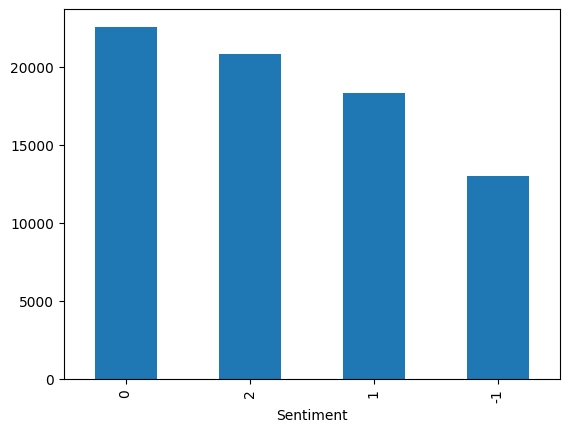

In [16]:
data['Sentiment'].value_counts().plot(kind='bar')

### Not That Much Imblance In Dataset

In [17]:
data.isna().sum() #Checking Null Data

,0
Sentiment,0
Tweet,686


In [18]:
data.dropna(inplace=True)
data_validate.dropna(inplace=True)

In [19]:
mask = data["Tweet"].str.match(r"^\d+$", na=False) #Checking Just Numeric Row
print(mask.value_counts())

Tweet
False    73991
True         5
Name: count, dtype: int64


In [20]:
# keep only rows where Tweet is NOT just digits
data = data[~data["Tweet"].str.match(r"^\d+$", na=False)]
# keep only rows where Tweet is NOT just digits
data_validate = data_validate[~data_validate["Tweet"].str.match(r"^\d+$", na=False)]

In [21]:
mask = data["Tweet"].str.match(r"^\d+$", na=False) #Checking Just Numeric Row
print(mask.value_counts())

Tweet
False    73991
Name: count, dtype: int64


In [22]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [24]:
data.head()

,Sentiment,Tweet
0,2,im getting on borderlands and i will murder yo...
1,2,I am coming to the borders and I will kill you...
2,2,im getting on borderlands and i will kill you ...
3,2,im coming on borderlands and i will murder you...
4,2,im getting on borderlands 2 and i will murder ...


In [25]:
def convert_to_corpus(text:str):
  corpus = []
  text = text.lower()
  text = re.sub(r'(?:https?|ftp|ssh)://\S+', 'url', text)
  text = re.sub(r'<.*?>', ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  words = text.split()
  words = [lemmatizer.lemmatize(word=word, pos='v') for word in words if word not in stop_words]
  return ' '.join(words)

In [26]:
data['Tweet'] = data['Tweet'].apply(convert_to_corpus)

In [27]:
data_validate['Tweet'] = data_validate['Tweet'].apply(convert_to_corpus)

In [28]:
for i in data['Tweet'].sample(50):
  print(i)

btw serious hate game
see cunning tell nigga better fuck min get ps mf gah fuck lil momma
nvidia new background removal insane green screen use
really baffle streamers stream black ops cold war hello know beta live right right url
league legends players bronze play support euw clearly need one supps random match shit
still play poker facebook
pretty sure tetris effect already consider best launch title xbox series x
ahh sound awesome buy absolutely everything great deal great way spend time launch
ban battlefield player dig occur see detail bf db com player ban
let hope awesome
start red dead redemption
talk yoo oh pubg
video actually iconic worth another watch
enjoy watch nice one roger motion capture game top notch performances talented cast outstanding bravo
great servers play non quals pro league guess rubberbanding reload
hide store playstation com
overwatch trash fuck game
game love fuck ruin
tl dr game get content summer wonder game disaster
really thankful ghostrecon uk bring s

In [29]:
# mask True where Tweet column is only whitespace or empty
mask = data["Tweet"].str.strip().eq("")

# see those rows
empty_like = data[mask].value_counts()
print(empty_like)
print(mask.sum())

Sentiment  Tweet
 2                  553
 1                  506
 0                  490
-1                  277
Name: count, dtype: int64
1826


In [30]:
data = data[~data["Tweet"].str.strip().eq("")] # Removing Empty Row
data_validate = data_validate[~data_validate["Tweet"].str.strip().eq("")]

In [31]:
for i in data['Tweet'].sample(50):
  print(i)

try apex legends season also play rank series come watch suck badly rhandlerr rhandlerr rhandlerr twitch tv thatbosslife
hype okay xbox really like kill
shadow award winner cry kings last pick medal tv clip
look expensive hide
let fuck
com fun theme gameplay mw de youtu c sq ohffxqro
love turn hot new tv show
fact play competitive hearthstone right go lie
wonder gta make lil yr olds wanna killers grow
much real fun stream tonight play fifa styldbykev get sick like goallsss thank everyone stop clip way happen like time tonight url
google name horror aesthetic mean hot pic twitter com p asnp jke
check item get grip insatiable maw
eamaddennfl men constantly fix stupid h h gameplay tire receivers get stick even defenders call
honestly think nba k doesnt understand definition exploit miss basketball ld k beluba
rainbow game happy hacker code interface r tracker network internal profile pc vib
oh lanta
johnson johnson halt sales skin whiten cream radio com article johns via radiodotcom
omg w

In [32]:
# Our Corpus Is Ready To Proceed

In [33]:
from sklearn.model_selection import train_test_split

X = data['Tweet']
y = data['Sentiment']

X_valid = data_validate['Tweet']
y_valid = data_validate['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Check Shape
print(X_train.shape, X_test.shape, X_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(57732,) (14433,) (999,)
(57732,) (14433,) (999,)


In [35]:
# Convert Is To Vector

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #TF-IDF, BOW

In [37]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_valid_tfidf = tfidf.transform(X_valid)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
rfr = RandomForestClassifier(n_estimators=100, random_state=42)
rfr.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rfr.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9048685351054608
              precision    recall  f1-score   support

          -1       0.94      0.83      0.88      2518
           0       0.89      0.94      0.92      4195
           1       0.92      0.90      0.91      3289
           2       0.88      0.92      0.90      3842

    accuracy                           0.90     13844
   macro avg       0.91      0.90      0.90     13844
weighted avg       0.91      0.90      0.90     13844

[[2078  163   80  197]
 [  42 3962   71  120]
 [  36  145 2967  141]
 [  52  178   92 3520]]


In [85]:
y_valid_pred = rfr.predict(X_valid_tfidf)
print(accuracy_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

0.9298597194388778
              precision    recall  f1-score   support

          -1       0.97      0.88      0.92       172
           0       0.90      0.97      0.93       265
           1       0.92      0.93      0.92       285
           2       0.94      0.93      0.94       276

    accuracy                           0.93       998
   macro avg       0.94      0.93      0.93       998
weighted avg       0.93      0.93      0.93       998



In [86]:
# So Random Forest Is Performing Good, But Lets Do Hyper Parameter Tunning For TFIDF

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [88]:

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100))
])
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (2, 3)],
    'tfidf__max_features': [5000, 10000, 20000],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'tfidf__max_features': [5000, 10000, 20000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 3)]},
             scoring='accuracy')

In [89]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 1)}
0.9132053042715718


In [90]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9352065876914186
              precision    recall  f1-score   support

          -1       0.97      0.87      0.92      2518
           0       0.92      0.96      0.94      4195
           1       0.95      0.93      0.94      3289
           2       0.92      0.95      0.93      3842

    accuracy                           0.94     13844
   macro avg       0.94      0.93      0.93     13844
weighted avg       0.94      0.94      0.94     13844



In [91]:
y_pred = best_model.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

0.9418837675350702
              precision    recall  f1-score   support

          -1       0.99      0.90      0.94       172
           0       0.93      0.96      0.94       265
           1       0.92      0.93      0.93       285
           2       0.95      0.96      0.95       276

    accuracy                           0.94       998
   macro avg       0.95      0.94      0.94       998
weighted avg       0.94      0.94      0.94       998



In [92]:
import joblib
joblib.dump(best_model, 'sentiment_classifier.pkl')

['sentiment_classifier.pkl']

In [2]:
## Lost Connection With Internet So We Are Not Tunning With Just Best Pera

FileNotFoundError: [Errno 2] No such file or directory: 'sentiment_classifier.pkl'

In [41]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1,1))),
    ('clf', RandomForestClassifier(n_estimators=100))
])

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=20000)),
                ('clf', RandomForestClassifier())])

In [43]:
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9292593362433312
              precision    recall  f1-score   support

          -1       0.95      0.87      0.91      2558
           0       0.92      0.95      0.94      4312
           1       0.94      0.93      0.93      3462
           2       0.92      0.94      0.93      4101

    accuracy                           0.93     14433
   macro avg       0.93      0.92      0.93     14433
weighted avg       0.93      0.93      0.93     14433



In [44]:
y_pred = pipeline.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

0.950950950950951
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95       172
           0       0.94      0.96      0.95       265
           1       0.93      0.95      0.94       285
           2       0.97      0.96      0.97       277

    accuracy                           0.95       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.95      0.95       999



In [47]:
import joblib
joblib.dump(pipeline, 'sentiment_classifier.pkl')

['sentiment_classifier.pkl']

In [46]:
import os
import shutil

# Define the path to the saved model file
model_file_path = 'sentiment_classifier.pkl'

# Define the destination path in your Google Drive
# Make sure the 'Colab Notebooks' directory exists in your Drive, or change the path as needed
drive_destination_path = '/content/drive/MyDrive/Colab Notebooks/'

# Create the destination directory if it doesn't exist
os.makedirs(drive_destination_path, exist_ok=True)

# Move the file to Google Drive
shutil.move(model_file_path, drive_destination_path)

print(f"Model saved to: {drive_destination_path + os.path.basename(model_file_path)}")

Model saved to: /content/drive/MyDrive/Colab Notebooks/sentiment_classifier.pkl
